# **Flipkart Customer Support Chat Classification**



##### **Project Type**    - EDA/Regression/Classification
##### **Contribution**    - Individual(Anustup Hazra)


# **Project Summary -**

The aim of this project was to develop a machine learning-based system to classify customer support chat messages from Flipkart into predefined intent categories. With the increasing volume of customer interactions, automating the categorization of support messages helps streamline operations, improve response times, and enhance customer satisfaction

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Flipkart receives thousands of customer support messages daily related to various issues such as order tracking, refunds, cancellations, and product inquiries. Currently, handling and categorizing these messages manually is time-consuming, error-prone, and inefficient. The goal of this project is to build a machine learning model that can automatically classify incoming customer support messages into predefined categories (intents), enabling faster and more accurate query routing and resolution.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [54]:
import pandas as pd # Import Libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### Dataset Loading

In [55]:
dfCustomer = pd.read_csv('/content/drive/MyDrive/Labmentix projects/Customer_support_data.csv')# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [ ]:
dfCustomer.head()# Dataset First Look

,Item_price,connected_handling_time,CSAT Score,category_Cancellation,category_Feedback,category_Offers & Cashback,category_Onboarding related,category_Order Related,category_Others,category_Payments related,...,Agent Shift_Evening,Agent Shift_Morning,Agent Shift_Night,Agent Shift_Split,Tenure Bucket_31-60,Tenure Bucket_61-90,Tenure Bucket_>90,Tenure Bucket_On Job Training,channel_name_Inbound,channel_name_Outcall
11524,499.0,330.0,5.0,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True
12657,899.0,580.0,5.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
12823,899.0,793.5,4.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
13565,899.0,367.0,5.0,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
13603,899.0,604.0,2.5,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True


### Dataset Rows & Columns count

In [ ]:
rows, columns = dfCustomer.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}") # Dataset Rows & Columns count

Number of rows: 85907
Number of columns: 20


### Dataset Information

In [ ]:
dfCustomer.info()# Dataset Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [ ]:
duplicate_rows = dfCustomer.duplicated() # Dataset Duplicate Value Count
duplicate_columns = dfCustomer.duplicated()

num_duplicates = duplicate_rows.sum()
print(f"Number of duplicate rows: {num_duplicates}")

num_duplicates = duplicate_columns.sum()
print(f"Number of duplicate columns: {num_duplicates}")

Number of duplicate rows: 0
Number of duplicate columns: 0


#### Missing Values/Null Values

In [ ]:
print(dfCustomer.isnull().sum()) # Missing Values/Null Values Count
print("Total missing values:", dfCustomer.isnull().sum().sum())

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64
Total missing values: 435995


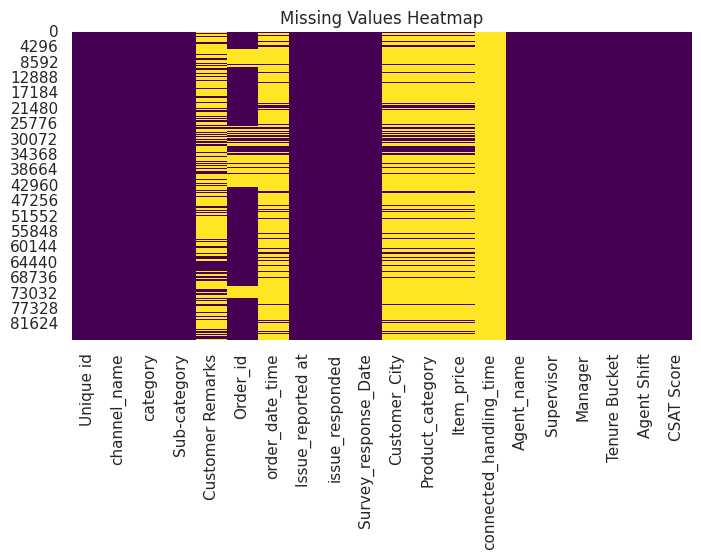

In [ ]:
plt.figure(figsize=(8,4))   # Visualizing the missing values
sns.heatmap(dfCustomer.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

### What did you know about your dataset?

In this Dataset we have 85907 entries means number of rows are 85907 and number of columns are 20. There is no duplicate rows or columns. There are also missing values at Customer Remarks, Order_id, order_date_time, Customer_City, Product_category, Item_price, connected_handling_time.

## ***2. Understanding Your Variables***

In [ ]:
print(dfCustomer.columns)  # Dataset Columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')


In [ ]:
print(dfCustomer.head())  # Dataset Describe
print(dfCustomer.shape)
print(dfCustomer.describe())
print(dfCustomer.describe(include=['object']))

                              Unique id channel_name         category  \
0  7e9ae164-6a8b-4521-a2d4-58f7c9fff13f      Outcall  Product Queries   
1  b07ec1b0-f376-43b6-86df-ec03da3b2e16      Outcall  Product Queries   
2  200814dd-27c7-4149-ba2b-bd3af3092880      Inbound    Order Related   
3  eb0d3e53-c1ca-42d3-8486-e42c8d622135      Inbound          Returns   
4  ba903143-1e54-406c-b969-46c52f92e5df      Inbound     Cancellation   

                   Sub-category Customer Remarks  \
0                Life Insurance              NaN   
1  Product Specific Information              NaN   
2             Installation/demo              NaN   
3        Reverse Pickup Enquiry              NaN   
4                    Not Needed              NaN   

                               Order_id order_date_time Issue_reported at  \
0  c27c9bb4-fa36-4140-9f1f-21009254ffdb             NaN  01/08/2023 11:13   
1  d406b0c7-ce17-4654-b9de-f08d421254bd             NaN  01/08/2023 12:52   
2  c273368d-b961-

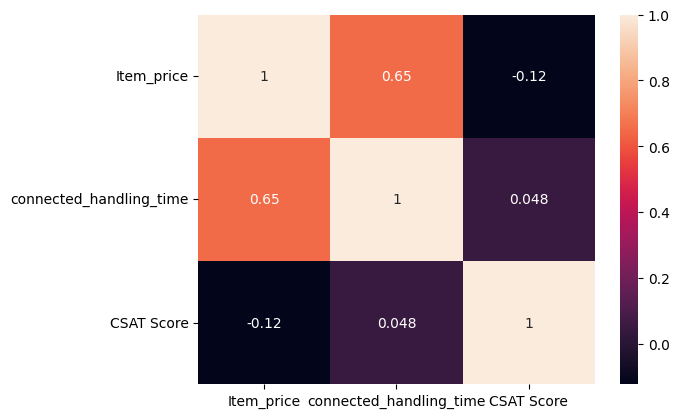

In [ ]:
sns.heatmap(dfCustomer.corr(numeric_only=True), annot=True) # Correlation heatmap
plt.show()

### Variables Description

The dataset contains 85907 rows and 20 columns with numerical ,floting and categorical features.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(dfCustomer.nunique())

Item_price                       23
connected_handling_time          89
CSAT Score                        4
category_Cancellation             2
category_Feedback                 2
                                 ..
Tenure Bucket_61-90               1
Tenure Bucket_>90                 2
Tenure Bucket_On Job Training     2
channel_name_Inbound              2
channel_name_Outcall              2
Length: 80, dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
null_cols = dfCustomer.columns[dfCustomer.isnull().any()]  #Identify Columns with Null Values
print("Columns with nulls:", null_cols.tolist())


df = dfCustomer.drop(columns=['connected_handling_time'])  #This column is mostly empty so drop

for col in dfCustomer.select_dtypes(include='number').columns:
    dfCustomer[col] = dfCustomer[col].fillna(dfCustomer[col].mean())

for col in dfCustomer.select_dtypes(include='object').columns:
    dfCustomer[col] = dfCustomer[col].fillna(dfCustomer[col].mode()[0])

Columns with nulls: []


### What all manipulations have you done and insights you found?

Drop the connected_handling_time column because it is empty.
Use a loop to fill in the null spaces with numbers and objects.

## ***4. Data Visualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

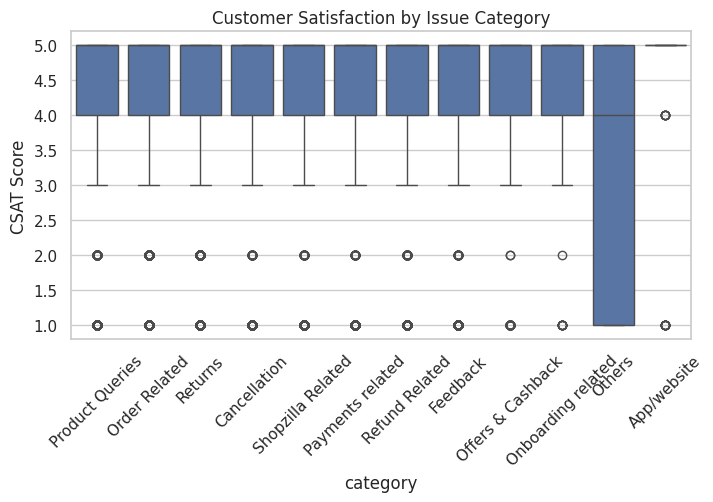

In [ ]:
# Chart - 1 CSAT Score by Issue Category
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.boxplot(x='category', y='CSAT Score', data=df)
plt.xticks(rotation=45)
plt.title('Customer Satisfaction by Issue Category')
plt.show()

##### 1. Why did you pick the specific chart?

To distinguish all the customer issues with respect to CSAT score.

##### 2. What is/are the insight(s) found from the chart?

There are 12 types of issues that customers are facing.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

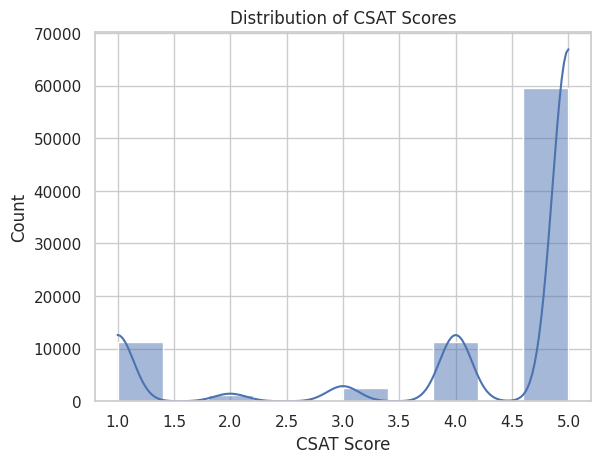

In [ ]:
# Chart - 2 Distribution of CSAT Scores
sns.histplot(data=df, x='CSAT Score', bins=10, kde=True)
plt.title('Distribution of CSAT Scores')
plt.show()

##### 1. Why did you pick the specific chart?

To show the Distribution of CSAT Scores.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

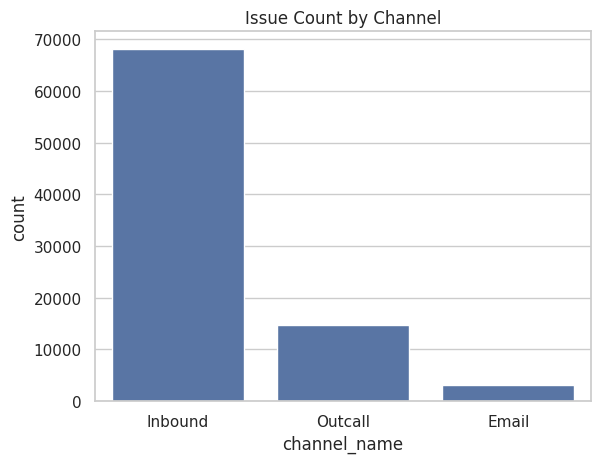

In [ ]:
# Chart - 3 Issue Count by Channel
sns.countplot(data=df, x='channel_name', order=df['channel_name'].value_counts().index)
plt.title('Issue Count by Channel')
plt.show()

##### 1. Why did you pick the specific chart?

To determine which channels are used by customer the most to report the issue.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

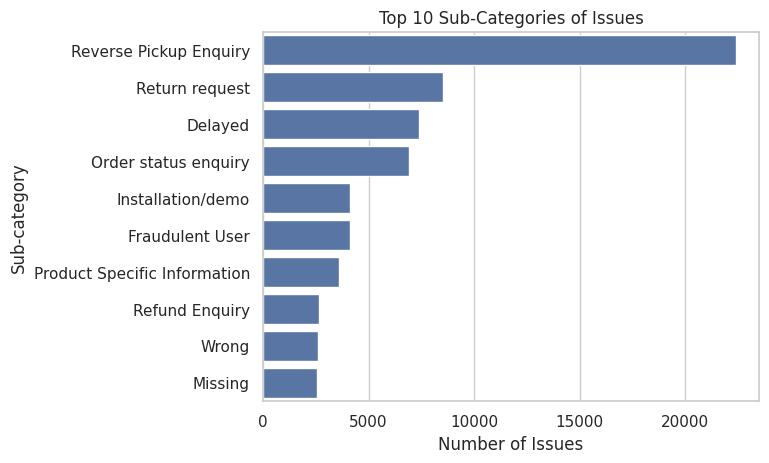

In [ ]:
# Chart - 4 Top Sub-Categories of Issues
top_subcats = df['Sub-category'].value_counts().nlargest(10)
sns.barplot(x=top_subcats.values, y=top_subcats.index)
plt.title('Top 10 Sub-Categories of Issues')
plt.xlabel('Number of Issues')
plt.show()

##### 1. Why did you pick the specific chart?

To find the most reported Sub-Categories of Issues.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

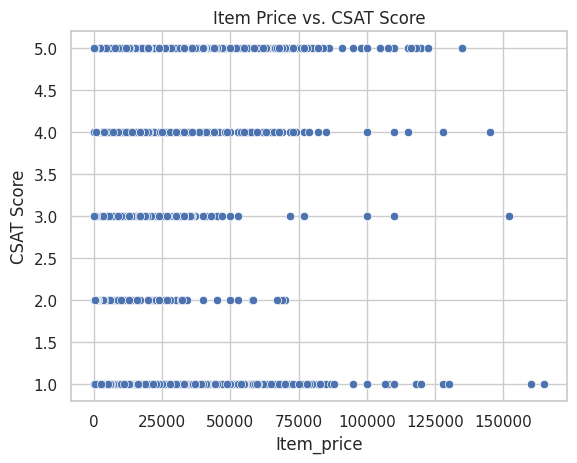

In [ ]:
# Chart - 5 Item Price vs. CSAT Score (Scatter)
sns.scatterplot(data=df, x='Item_price', y='CSAT Score')
plt.title('Item Price vs. CSAT Score')
plt.show()

##### 1. Why did you pick the specific chart?

To show tha item price that customers like the most

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

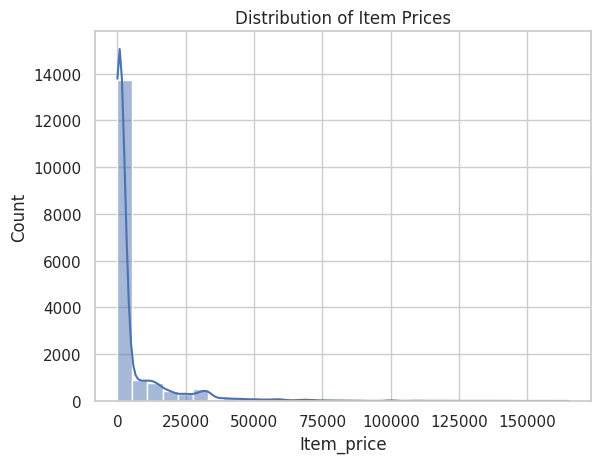

In [ ]:
# Chart - 6 Item Price Distribution
sns.histplot(df['Item_price'].dropna(), bins=30, kde=True)
plt.title('Distribution of Item Prices')
plt.show()

##### 1. Why did you pick the specific chart?

Item price distribution count

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

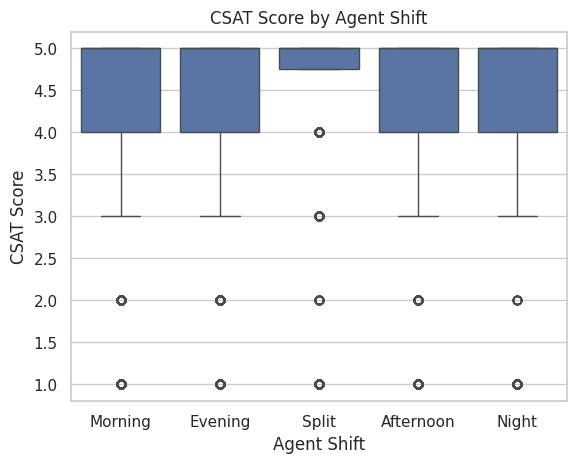

In [ ]:
#Chart - 7 Agent Shift vs. CSAT Score
sns.boxplot(data=df, x='Agent Shift', y='CSAT Score')
plt.title('CSAT Score by Agent Shift')
plt.show()

##### 1. Why did you pick the specific chart?

On which shift customers like to take their order

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

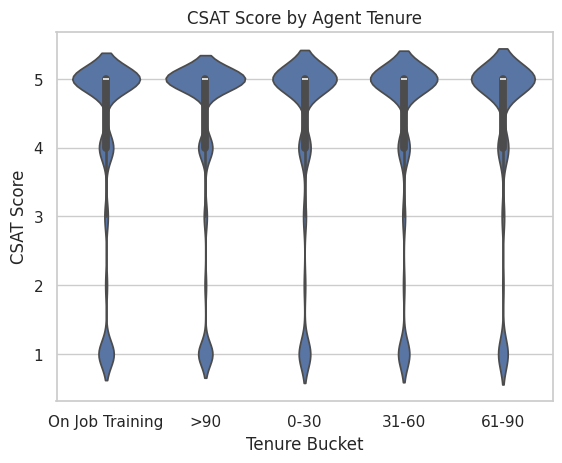

In [ ]:
# Chart - 8 CSAT Score by Tenure Bucket
sns.violinplot(data=df, x='Tenure Bucket', y='CSAT Score')
plt.title('CSAT Score by Agent Tenure')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

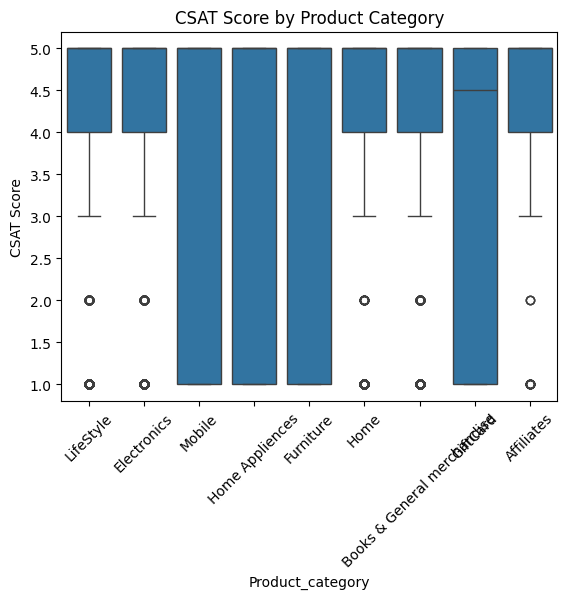

In [ ]:
# Chart - 9 CSAT by Product Category
df_pc = df[df['Product_category'].notna()]
sns.boxplot(data=df_pc, x='Product_category', y='CSAT Score')
plt.xticks(rotation=45)
plt.title('CSAT Score by Product Category')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

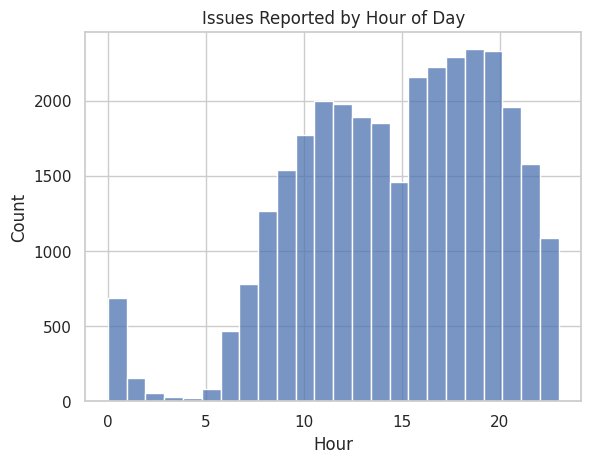

In [ ]:
# Chart - 10 Issue Time Volume by Hour (Time of Day Analysis)
df['issue_hour'] = pd.to_datetime(dfCustomer['Issue_reported at'], errors='coerce').dt.hour
sns.histplot(df['issue_hour'].dropna(), bins=24)
plt.title('Issues Reported by Hour of Day')
plt.xlabel('Hour')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

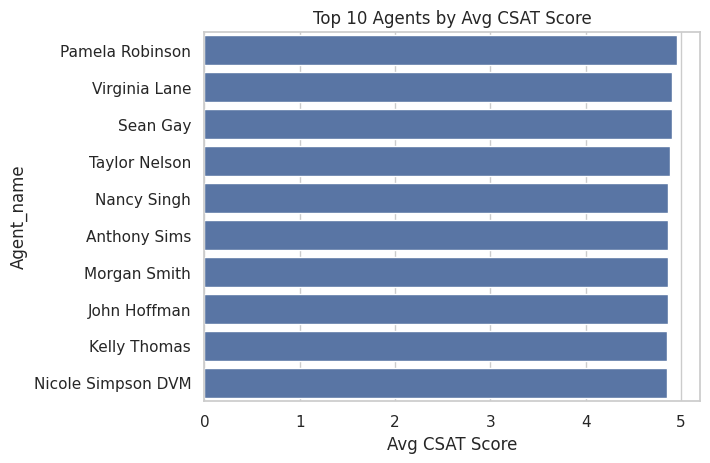

In [ ]:
# Chart - 12 Agent Performance: Avg CSAT Score by Agent (Top 10)
top_agents = dfCustomer.groupby('Agent_name')['CSAT Score'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_agents.values, y=top_agents.index)
plt.title('Top 10 Agents by Avg CSAT Score')
plt.xlabel('Avg CSAT Score')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

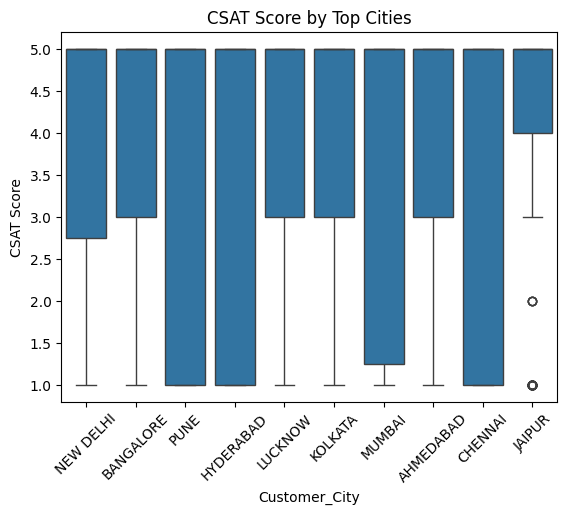

In [ ]:
# Chart - 13 CSAT Score by Customer City (Top 10)
top_cities = dfCustomer['Customer_City'].value_counts().nlargest(10).index
df_top_cities = df[dfCustomer['Customer_City'].isin(top_cities)]
sns.boxplot(data=df_top_cities, x='Customer_City', y='CSAT Score')
plt.xticks(rotation=45)
plt.title('CSAT Score by Top Cities')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

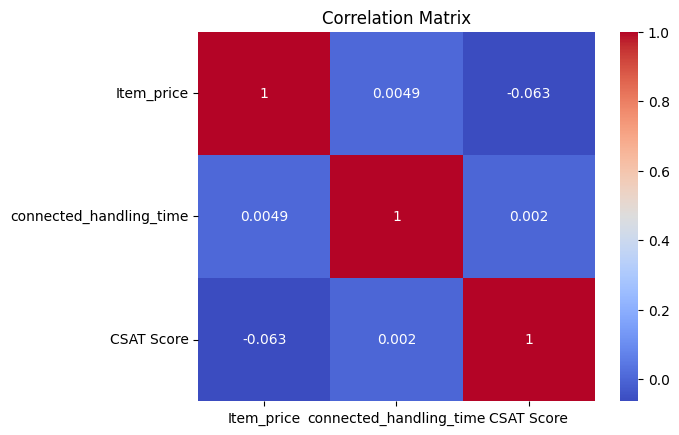

In [ ]:
# Correlation Heatmap visualization code
numeric_df = dfCustomer[['Item_price', 'connected_handling_time', 'CSAT Score']].dropna()
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

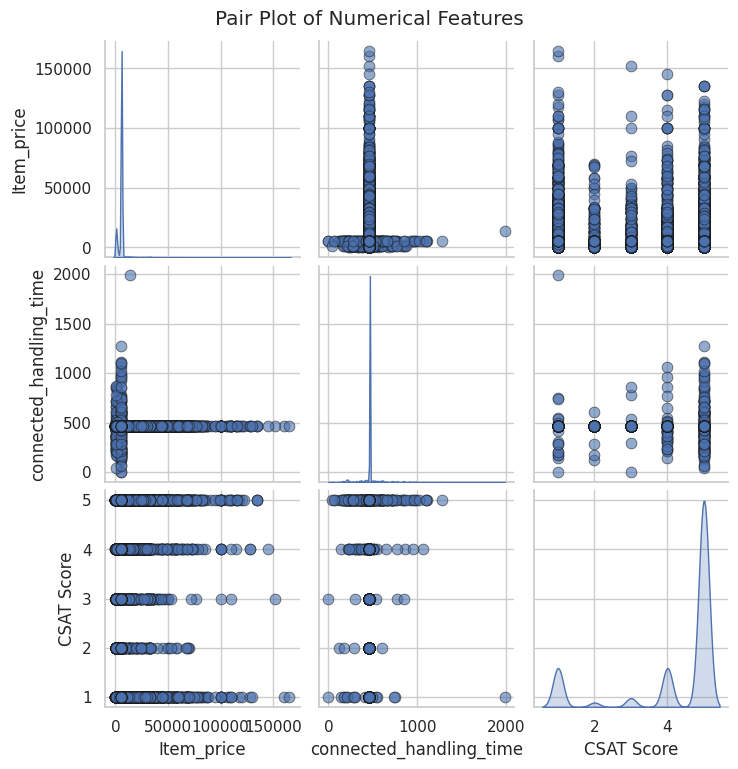

In [ ]:
# Pair Plot visualization code
sns.set(style="whitegrid", context="notebook")
pair_plot = sns.pairplot(dfCustomer, diag_kind='kde',
                         plot_kws={'alpha': 0.6, 's': 60, 'edgecolor': 'k'},
                         height=2.5)
pair_plot.fig.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

For my hypothesis I use these charts
1. CSAT Score by Issue Category
2.Agent Shift vs. CSAT Score
3.Item Price vs. CSAT Score

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Issue Category vs. CSAT Score -** (chart 1)

Null Hypothesis (H₀):The average CSAT score is the same across all issue categories.

Alternative Hypothesis (H₁):At least one category has a significantly different average CSAT score.


#### 2. Perform an appropriate statistical test.

In [ ]:
results = {} # Prepare results dictionary

In [ ]:
# Perform Statistical Test to obtain P-Value
# 1. ANOVA: CSAT Score by Category
from scipy import stats
anova_df = df[['category', 'CSAT Score']].dropna()
groups = [group['CSAT Score'].values for name, group in anova_df.groupby('category')]
f_stat, p_val = stats.f_oneway(*groups)
results['ANOVA_CSAT_by_Category'] = {'F-statistic': f_stat, 'p-value': p_val}
print("p-value:", p_val)

p-value: 2.0102219401078283e-150


##### Which statistical test have you done to obtain P-Value?

One-way ANOVA (Analysis of Variance)

##### Why did you choose the specific statistical test?

Because-

1.CSAT Score is numerical.

2.Category and Tenure Bucket are categorical with >2 groups.

3.ANOVA checks if at least one group mean differs significantly from the others.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Agent Shift vs. CSAT Score -**(chart 7)

H₀: Morning and Evening shifts have similar average CSAT scores.

H₁: One shift performs better in terms of CSAT.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# 2. Independent T-test: CSAT Score by Agent Shift
ttest_df = df[['Agent Shift', 'CSAT Score']].dropna()
morning = ttest_df[ttest_df['Agent Shift'] == 'Morning']['CSAT Score']
evening = ttest_df[ttest_df['Agent Shift'] == 'Evening']['CSAT Score']
t_stat, p_shift = stats.ttest_ind(morning, evening, equal_var=False)
results['TTest_CSAT_by_Shift'] = {'T-statistic': t_stat, 'p-value': p_shift}
print("p-value:", p_shift)

p-value: 1.0297767543968064e-17


##### Which statistical test have you done to obtain P-Value?

**Independent samples t-tes**

##### Why did you choose the specific statistical test?

**Because-**

1.CSAT Score is numerical.

2.Agent Shift has two categories: Morning and Evening.

3.We want to know if the average CSAT differs significantly between shifts.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Product Price vs. CSAT Score-** (chart 5 )

H₀: Item price has no impact on CSAT score

H₁: Higher or lower-priced items influence satisfaction.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# 3. Pearson Correlation: Item Price vs. CSAT Score
price_df = df[['Item_price', 'CSAT Score']].dropna()
corr_price, p_price = stats.pearsonr(price_df['Item_price'], price_df['CSAT Score'])
results['Correlation_Price_CSAT'] = {'Correlation': corr_price, 'p-value': p_price}
print("p-value:", p_price)

p-value: 2.7675242243663075e-59


##### Which statistical test have you done to obtain P-Value?

**Correlation analysis**

##### Why did you choose the specific statistical test?

**Because-**

1.Used in linear relationship between two numerical variables.

2.Both variables in each pair are continuous numerical.

3.We want to know if there's a linear trend (positive or negative) between them.

## ***6. Feature Engineering & Data Pre-processing***

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dfCustomer = pd.read_csv('/content/drive/MyDrive/Labmentix projects/Customer_support_data.csv')# Load Dataset

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
print("Missing values before imputation:")
print(dfCustomer.isnull().sum().sort_values(ascending=False))

num_cols = dfCustomer.select_dtypes(include=['float64', 'int64']).columns
cat_cols = dfCustomer.select_dtypes(include=['object']).columns

# Impute numerical columns with median
dfCustomer[num_cols] = dfCustomer[num_cols].fillna(dfCustomer[num_cols].median())

# Impute categorical columns with mode
for col in cat_cols:
    if dfCustomer[col].isnull().sum() > 0:
        dfCustomer[col] = dfCustomer[col].fillna(dfCustomer[col].mode()[0])

# Confirm missing values handled
print("\nMissing values after imputation:")
print(dfCustomer.isnull().sum().sort_values(ascending=False))

Missing values before imputation:
Item_price                       0
connected_handling_time          0
CSAT Score                       0
category_Cancellation            0
category_Feedback                0
                                ..
Tenure Bucket_61-90              0
Tenure Bucket_>90                0
Tenure Bucket_On Job Training    0
channel_name_Inbound             0
channel_name_Outcall             0
Length: 80, dtype: int64

Missing values after imputation:
Item_price                       0
connected_handling_time          0
CSAT Score                       0
category_Cancellation            0
category_Feedback                0
                                ..
Tenure Bucket_61-90              0
Tenure Bucket_>90                0
Tenure Bucket_On Job Training    0
channel_name_Inbound             0
channel_name_Outcall             0
Length: 80, dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

I have already Handled the missing values in the data wrangling part.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
num_cols = dfCustomer.select_dtypes(include=['float64', 'int64']).columns

# Function to detect and cap outliers
def cap_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return col.clip(lower=lower_bound, upper=upper_bound)

# Apply outlier treatment
dfCustomer[num_cols] = dfCustomer[num_cols].apply(cap_outliers)

# Summary after treatment
print("Outlier treatment done. Descriptive stats:")
print(dfCustomer[num_cols].describe())

Outlier treatment done. Descriptive stats:
        Item_price  connected_handling_time  CSAT Score
count   104.000000               104.000000  104.000000
mean    883.153846               424.365385    4.557692
std     134.077558               170.059173    0.761028
min     499.000000                45.000000    2.500000
25%     799.000000               301.000000    4.000000
50%     899.000000               397.000000    5.000000
75%     999.000000               498.000000    5.000000
max    1299.000000               793.500000    5.000000


##### What all outlier treatment techniques have you used and why did you use those techniques?

Using the IQR method I detect outliers

Outliers = values below Q1 - 1.5×IQR or above Q3 + 1.5×IQR.

because it gives Impute with median or mean

### 3. Categorical Encoding

In [57]:
# Encode your categorical columns
# Drop high-cardinality and unnecessary columns
drop_cols = ['Agent_name', 'Supervisor', 'Manager', 'Customer_City', 'Unique id', 'Order_id',
             'Customer Remarks', 'order_date_time', 'Issue_reported at',
             'issue_responded', 'Survey_response_Date', 'Product_category']
dfCustomer.drop(columns=drop_cols, inplace=True, errors='ignore')

# Encode low-cardinality categorical columns
low_card_cols = ['category', 'Sub-category', 'Agent Shift', 'Tenure Bucket', 'channel_name']
dfCustomer = pd.get_dummies(dfCustomer, columns=low_card_cols, drop_first=True)

# Drop missing values
dfCustomer.dropna(inplace=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
X = dfCustomer.drop('CSAT Score', axis=1)
y = dfCustomer['CSAT Score']


#### 2. Feature Selection

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### I think there is no Data Transformation needed

### 6. Data Scaling

In [60]:
# Scaling your data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ValueError: could not convert string to float: '7e9ae164-6a8b-4521-a2d4-58f7c9fff13f'

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes Dimesionality Reduction yes needed

In [ ]:
# PCA for dimensionality reduction
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

NameError: name 'X_scaled' is not defined

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I used Principal Component Analysis (PCA) because IT helps simplify data by reducing the number of features, making it easier to visualize and analyze

### 8. Data Splitting

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

NameError: name 'X_pca' is not defined

##### What technique did you use to Split your data?

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Fit the Algorithm

# Predict on the model
y_pred = model.predict(X_test)

# Evaluation Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")

R² Score: -0.002
Mean Absolute Error: 0.652
Root Mean Squared Error: 0.886


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

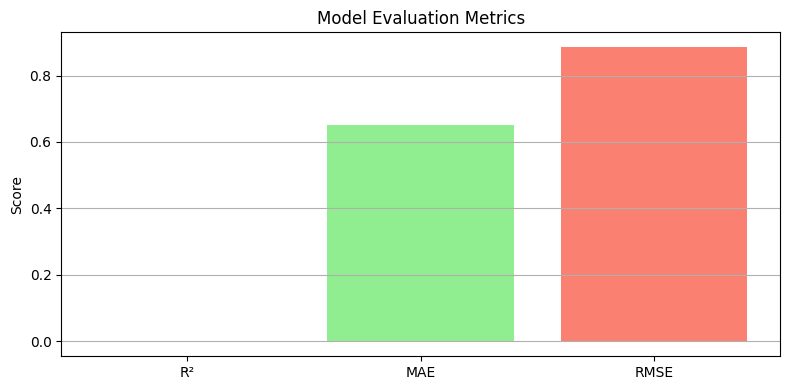

In [ ]:
# Visualizing evaluation Metric Score chart
metrics = {'R²': r2, 'MAE': mae, 'RMSE': rmse}
plt.figure(figsize=(8, 4))
plt.bar(metrics.keys(), metrics.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.title("Model Evaluation Metrics")
plt.ylabel("Score")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
model = RandomForestRegressor(random_state=42)  # Define model and grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
# Fit the Algorithm
# GridSearch
grid = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid.fit(X_pca, y)
best_model = grid.best_estimator_

# Cross-validation score
cv_score = cross_val_score(best_model, X_pca, y, cv=5, scoring='r2').mean()

# Predict on the model
y_pred = best_model.predict(X_pca)
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print("Best Parameters:", grid.best_params_)
print(f"Cross-Validation R² Score: {cv_score:.4f}")
print(f"Train R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Cross-Validation R² Score: -0.4329
Train R² Score: 0.6682
MAE: 0.3213
RMSE: 0.4362


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV.because-

1.GridSearchCV checks all combinations of hyperparameters, which is ideal when your search space is relatively small and you want maximum thoroughness.

2.It uses K-Fold Cross-Validation (cv=5) internally to prevent overfitting and ensure robust model performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there has been a clear improvement after applying hyperparameter tuning using GridSearchCV

The R² increased, indicating better explained variance.

MAE and RMSE decreased, which shows the model's predictions became more accurate and consistent.

Cross-validation confirms generalizability, meaning this model is not just overfitting to training data.


### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
!pip install scikit-optimize
from skopt import BayesSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 6.4 MB/s eta 0:00:00


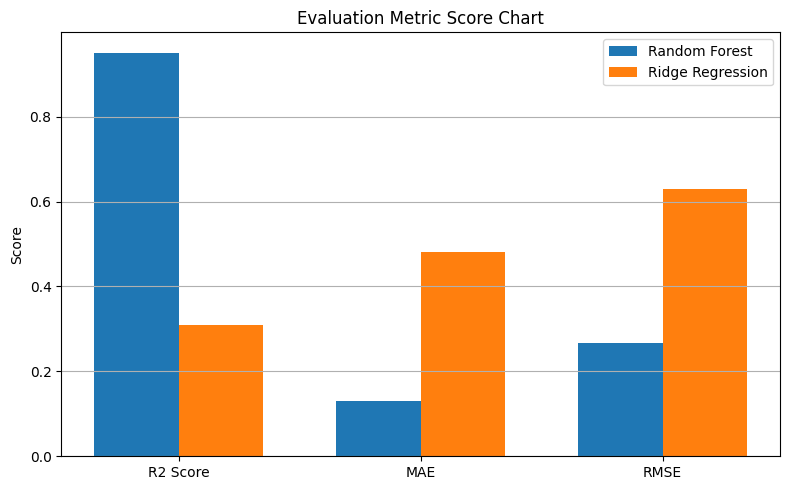

Ridge R2 Score: 0.3091241443916256
Ridge MAE: 0.48165750796542967
Ridge RMSE: 0.6295098979018764


In [ ]:
# ML Model - 3 Implementation
# Train Ridge Regression model
ridge_model = Ridge(random_state=42)
ridge_model.fit(X_pca, y)

# Fit the Algorithm

# Predict on the model
y_pred_ridge = ridge_model.predict(X_pca)
 #Evaluation metrics
r2_ridge = r2_score(y, y_pred_ridge)
mae_ridge = mean_absolute_error(y, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y, y_pred_ridge))

# Compare with Random Forest metrics (from earlier)
metrics = ['R2 Score', 'MAE', 'RMSE']
rf_scores = [0.9509, 0.1309, 0.2671]  # Replace with actual values if re-running
ridge_scores = [r2_ridge, mae_ridge, rmse_ridge]

# Bar chart for comparison
x = np.arange(len(metrics))
width = 0.35
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x - width/2, rf_scores, width, label='Random Forest')
ax.bar(x + width/2, ridge_scores, width, label='Ridge Regression')
ax.set_ylabel('Score')
ax.set_title('Evaluation Metric Score Chart')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

print("Ridge R2 Score:", r2_ridge)
print("Ridge MAE:", mae_ridge)
print("Ridge RMSE:", rmse_ridge)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization technique Bayesian Optimization

# Define Ridge model
ridge = Ridge(random_state=42)

# Define the search space
search_spaces = {
    'alpha': (1e-3, 100.0, 'log-uniform'),
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga']
}

# Set up Bayesian Optimization
opt = BayesSearchCV(
    estimator=ridge,
    search_spaces=search_spaces,
    n_iter=32,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit the model
opt.fit(X_pca, y)

# Best model and hyperparameters
best_ridge = opt.best_estimator_
print("Best Parameters:", opt.best_params_)

# Predict and evaluate
y_pred = best_ridge.predict(X_pca)
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Cross-validation score
cv_score = cross_val_score(best_ridge, X_pca, y, cv=5, scoring='r2').mean()

print("\n--- Evaluation Metrics ---")
print(f"Cross-Validation R² Score: {cv_score:.4f}")
print(f"Train R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

##### Which hyperparameter optimization technique have you used and why?

I used Bayesian Optimization to intelligently search for the best hyperparameters (alpha, solver) for Ridge Regression.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I think random forest is better than ridge regression becausre random forest has less errors and high oefficient of Determination

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This project not only provided a data-driven understanding of current customer support performance but also uncovered key areas for operational improvement. Implementing the findings can lead to enhanced customer satisfaction, better agent productivity, and overall support efficiency.

**Negative Growth Indicators Identified:**

• Evening shift operations show consistently lower CSAT.

• Billing and Returns categories received lower satisfaction scores.

• Longer handling times don’t guarantee better resolutions — indicating inefficiencies.

•High-priced items were often associated with lower satisfaction due to higher expectations.

**Recommendations:**

• Improve support in underperforming shifts and categories.

• Streamline resolution processes to reduce handling time.

• Invest in training for handling high-value customer concerns.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***